# Lab 05: Sign Classification with NBC

## Datasets

In [62]:
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.naive_bayes import GaussianNB

### SciKitLearn Digits Dataset

In [9]:
digits = datasets.load_digits()
digits_data = digits.data
digits_split = int(len(digits_data)*0.7)
digits_x_training = digits_data[:digits_split]
digits_x_testing = digits_data[digits_split:]
digits_target = digits.target
digits_y_training = digits_target[:digits_split]
digits_y_testing = digits_target[digits_split:]
print('Training data:', len(digits_x_training), '\nTraining Labels:', len(digits_y_training), '\nTesting Data:', 
      len(digits_x_testing), '\nTesting Labels:', len(digits_y_testing), '\nCheck:', 
      len(digits_data) == len(digits_x_training) + len(digits_x_testing))

Training data: 1257 
Training Labels: 1257 
Testing Data: 540 
Testing Labels: 540 
Check: True


### SciKitLearn Digits Dataset Summarized

In [31]:
digits_summarized = []
for d in digits_data:
    row = []
    for n in d:
        if n < 5:
            row.append(0)
        elif n > 10:
            row.append(2)
        else:
            row.append(1)
    digits_summarized.append(row)
digits_summ_x_training = digits_summarized[:digits_split]
digits_summ_x_testing = digits_summarized[digits_split:]
print('Training data:', len(digits_summ_x_training), '\nTesting Data:', 
      len(digits_summ_x_testing))

Training data: 1257 
Testing Data: 540


### MNIST Light

Training Data: 3500 
Testing Data: 1500 
Training Labels: 3500 
Testing Labels: 1500 
Check: True
(3500, 400)


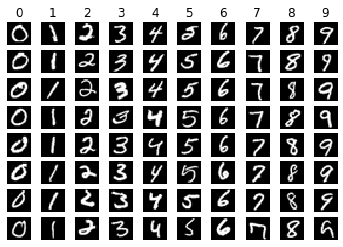

In [112]:
import MNIST
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')
train_features, test_features, train_labels, test_labels = mnist.get_data()
print('Training Data:', len(train_features),'\nTesting Data:', len(test_features), '\nTraining Labels:', 
      len(train_labels), '\nTesting Labels:', len(test_labels), '\nCheck:', 
      int(len(train_features)) == int((len(test_features) + len(train_features))*0.7))
print(train_features.shape)
mnist.visualize_random()

## Classifiers

### Gaussian NB Classifier (SciKitLearn)

#### Digits Dataset

In [26]:
gnb_digits = GaussianNB()
gnb_digits.fit(digits_x_training, digits_y_training)
y_pred_gnb_digits = gnb_digits.predict(digits_x_testing)

In [27]:
print("Classification report SKLearn GNB:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnb_digits)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnb_digits))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix SKLearn GNB:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0  2  0

#### Summarized Digits Dataset

In [32]:
gnb_digits_summ = GaussianNB()
gnb_digits_summ.fit(digits_summ_x_training, digits_y_training)
y_pred_gnb_digits_summ = gnb_digits_summ.predict(digits_summ_x_testing)

In [34]:
print("Classification report SKLearn GNB:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_gnb_digits_summ)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_gnb_digits_summ))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.86      0.34      0.49        53
           2       0.97      0.62      0.76        53
           3       1.00      0.19      0.32        53
           4       0.95      0.91      0.93        57
           5       0.94      0.57      0.71        56
           6       0.96      0.96      0.96        54
           7       0.82      0.85      0.84        54
           8       0.31      0.92      0.46        52
           9       0.63      0.78      0.70        55

    accuracy                           0.71       540
   macro avg       0.84      0.71      0.71       540
weighted avg       0.84      0.71      0.71       540


Confusion matrix SKLearn GNB:
[[50  0  0  0  1  0  0  0  2  0]
 [ 0 18  0  0  0  0  0  1 22 12]
 [ 1  0 33  0  0  0  0  0 18  1]
 [ 0  1  0 10  0  0  0  1 34  7]
 [ 0  0  0  0 52  0  1  1  3  0]
 [ 1  2  1

#### MNIST Light Dataset

In [24]:
gnb_mnist = GaussianNB()
gnb_mnist.fit(train_features, train_labels)
y_pred_gnb_mnist = gnb_mnist.predict(test_features)

In [25]:
print("Classification report SKLearn GNB:\n%s\n" % (metrics.classification_report(test_labels, y_pred_gnb_mnist)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred_gnb_mnist))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

### Nearest Centroid Classifier (NCC)

#### Fit function

In [116]:
def NCC_fit(X, Y):
        classes = set(Y)
        class_count = {k: 0 for k in classes}
        classes_dict = {k: np.array([0]*len(X[0])) for k in classes}
        for i in range(len(X)):
            for j in range(len(X[i])):
                classes_dict[Y[i]][j] += X[i][j]
            class_count[Y[i]] += 1
        ncc = []
        for k in classes_dict:
            ncc.append(classes_dict[k]/class_count[k])
        return np.array(ncc)

#### Predict function

In [126]:
def NCC_predict(centroid, X):
    prediction = []
    for x in X:
        temp = []
        for means in centroid:
            distance = np.linalg.norm(np.subtract(means,x))
            temp.append(distance)
        prediction.append(np.argmin(temp, axis=0))
    return prediction

#### Digits Dataset

In [127]:
ncc_fit_digits = NCC_fit(digits_x_training, digits_y_training)
y_pred_ncc_digits = NCC_predict(ncc_fit_digits, digits_x_testing)

In [128]:
print("Classification report NCC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_ncc_digits)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_ncc_digits))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.89      0.75      0.82        53
           2       0.98      0.85      0.91        53
           3       0.84      0.77      0.80        53
           4       0.98      0.93      0.95        57
           5       0.86      0.89      0.88        56
           6       0.98      0.96      0.97        54
           7       0.90      0.96      0.93        54
           8       0.80      0.75      0.77        52
           9       0.65      0.87      0.74        55

    accuracy                           0.87       540
   macro avg       0.88      0.87      0.88       540
weighted avg       0.88      0.87      0.88       540


Confusion matrix NCC:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  0  0  1  0  0  0 12]
 [ 1  0 45  6  0  0  0  0  0  1]
 [ 0  1  0 41  0  2  0  3  5  1]
 [ 1  0  0  0 53  0  0  0  3  0]
 [ 0  0  0  0  0 50  1  0 

#### Summarized Digits Dataset

In [129]:
ncc_fit_digits_summ = NCC_fit(digits_summ_x_training, digits_y_training)
y_pred_ncc_digits_summ = NCC_predict(ncc_fit_digits_summ, digits_summ_x_testing)

In [130]:
print("Classification report NCC:\n%s\n" % 
      (metrics.classification_report(digits_y_testing, y_pred_ncc_digits_summ)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(digits_y_testing, y_pred_ncc_digits_summ))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.81      0.66      0.73        53
           2       0.96      0.81      0.88        53
           3       0.76      0.77      0.77        53
           4       0.96      0.93      0.95        57
           5       0.88      0.89      0.88        56
           6       0.96      0.94      0.95        54
           7       0.88      0.94      0.91        54
           8       0.76      0.79      0.77        52
           9       0.66      0.82      0.73        55

    accuracy                           0.85       540
   macro avg       0.86      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540


Confusion matrix NCC:
[[51  0  0  0  1  1  0  0  0  0]
 [ 0 35  0  1  0  1  0  0  4 12]
 [ 1  1 43  7  0  0  0  0  0  1]
 [ 0  2  1 41  0  2  0  3  4  0]
 [ 1  0  0  0 53  0  0  0  3  0]
 [ 0  0  0  0  0 50  2  0 

#### MNIST Light Dataset

In [131]:
ncc_fit_mnist = NCC_fit(train_features, train_labels)
y_pred_ncc_mnist = NCC_predict(ncc_fit_mnist, test_features)

In [132]:
print("Classification report NCC:\n%s\n" % (metrics.classification_report(test_labels, y_pred_ncc_mnist)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(test_labels, y_pred_ncc_mnist))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.35      0.99      0.51       164
           1       0.94      0.88      0.90       152
           2       0.65      0.79      0.72       155
           3       0.62      0.66      0.64       154
           4       0.89      0.52      0.65       143
           5       0.00      0.00      0.00       141
           6       0.84      0.76      0.80       143
           7       0.74      0.78      0.76       158
           8       0.45      0.42      0.43       132
           9       0.77      0.17      0.28       158

    accuracy                           0.61      1500
   macro avg       0.62      0.60      0.57      1500
weighted avg       0.63      0.61      0.57      1500


Confusion matrix NCC:
[[162   0   1   0   0   0   1   0   0   0]
 [  0 133   3   3   0   0   0   0  13   0]
 [ 17   1 123   8   1   0   2   0   3   0]
 [ 35   0   6 102   0   1   1   2   7   0]
 [ 27   2   9   0  

### NB Classifier

#### Digits Dataset

#### Summarized Digits Dataset

### Own Gaussian NB Classifier

#### Digits Dataset

#### Summarized Digits Dataset

#### MNIST Light Dataset